In [1]:
import sys
sys.path.append('/Users/felicity/Downloads/xta') # path to xta
import os, sys
from xta import xta_sim

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('petrstyle.txt')
from matplotlib.ticker import NullFormatter
import glob, h5py
import shutil
import scipy.io
import pandas as pd
import pydicom as dicom
#import cv2

from astra import Astra#, template_dir
from astra.plot import plot_fieldmaps, plot_stats, plot_stats_with_layout
import distgen
from distgen import Generator
from distgen.writers import *
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot

#slice plots
# from h5py import File
# from pmd_beamphysics.interfaces import opal
# from pmd_beamphysics.plot import slice_plot
# from pmd_beamphysics.plot import marginal_plot, density_plot

# Generating electron distribution with tumor image

In [4]:
#tumor1='/Users/felicity/Downloads/field1/field1.jpg'

## Electron Distribution Generation

In [6]:
def generate_dist(dist_file):

    # dist_file = '/Users/felicity/downloads/field1/field1.dcm'
    dist = Generator(dist_file, verbose=False)
    
    #dist.input['xy_dist']['file'] = tumor6 #dcm_crop(dcm_path)
    dist.input['n_particle'] = int(1e4)
    dist.input['start']['MTE']['value'] = 130 #330
    
    
    fwhm = 0.06/2.355 # 60 fs = 0.06 ps
    dist.input['t_dist']['sigma_t']['value'] = fwhm
    
    dist.input['total_charge']['value'] = 1
    
        # dist.input['r_dist']['max_r']['value'] = 0.5
        
    dist.run()
    particles = dist.particles 
    #particles.write_astra('xta/astra-inputs/astra_particles.txt')
    #particles.write_astra('xta/astra-inputs/field1.jpg')
    
    return particles, dist

In [11]:
dist_file = '/Users/felicity/downloads/xta/astra-inputs/distgen.yaml'

## Electron Distribution Plots

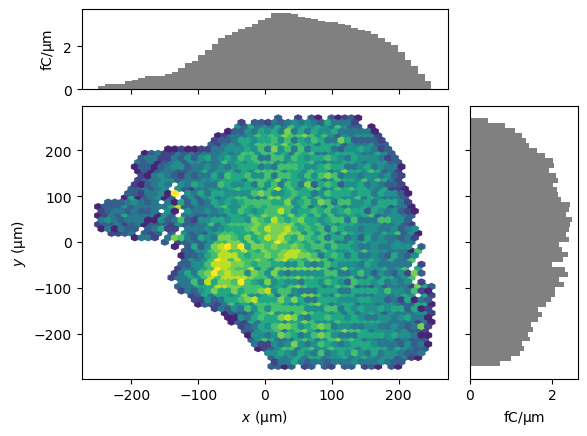

In [14]:
particles, dist = generate_dist(dist_file)
particles.plot('x','y')
plt.savefig('tumor6_2x2.pdf')

In [98]:
from PIL import Image
from PIL.TiffTags import TAGS

img = Image.open('field_1.tiff')
meta_dict = {TAGS[key] : img.tag[key] for key in img.tag_v2}

FileNotFoundError: [Errno 2] No such file or directory: '/Users/felicity/Summer2024/field_1.tiff'